In [1]:
import sys
sys.path.insert(1,"/home/manuelj/Repositories/AdversarialAttack-torch/src")

import torchvision.models as models

from data_utils import load_image
from decode_utils import decode, read_idx_2_label
from adversarial_algorithm import modify_image
from viz_utils import plot_images, show_predictions

#### First of all lets load the pretrained model and set the mode to evaluation.

In [2]:
model = models.alexnet(pretrained=True)
model = model.eval()

#### Now lets load the image and the dictionary with the conversion index -> class label

In [3]:
image = load_image('../Data/cat?.jpg')
dictionary = read_idx_2_label()

#### Finally lets see how it works with the example

In [4]:
predictions_cat = decode(model, image, dictionary)
show_predictions(predictions_cat)

Predicted as Persian_cat at index 283 with a probability of 0.17%


#### Now lets hack the image of my dog to classyfy as Persian Cat.

In [5]:
img_path = '../Data/roy.jpeg'
image = load_image(img_path)
predictions_initial = decode(model, image, dictionary)
show_predictions(predictions_initial)

Predicted as dingo at index 273 with a probability of 0.12%


In [8]:
target_class = 340 # Zebra
image_modified = modify_image(image, model, target_class, min_prob=0.25)

Iteration: 0, Prob: 0.12, actual class is: 273
Iteration: 10, Prob: 0.2, actual class is: 351
Iteration: 18, Prob: 0.22, actual class is: 340
Iteration: 19, Prob: 0.23, actual class is: 340
Iteration: 20, Prob: 0.25, actual class is: 340
Iteration: 21, Prob: 0.27, actual class is: 340


In [7]:
predictions_mod = decode(model, image_modified, dictionary)
predictions_or = decode(model, image, dictionary)

show_predictions(predictions_mod)
show_predictions(predictions_or)

Predicted as zebra at index 340 with a probability of 0.23%
Predicted as dingo at index 273 with a probability of 0.12%


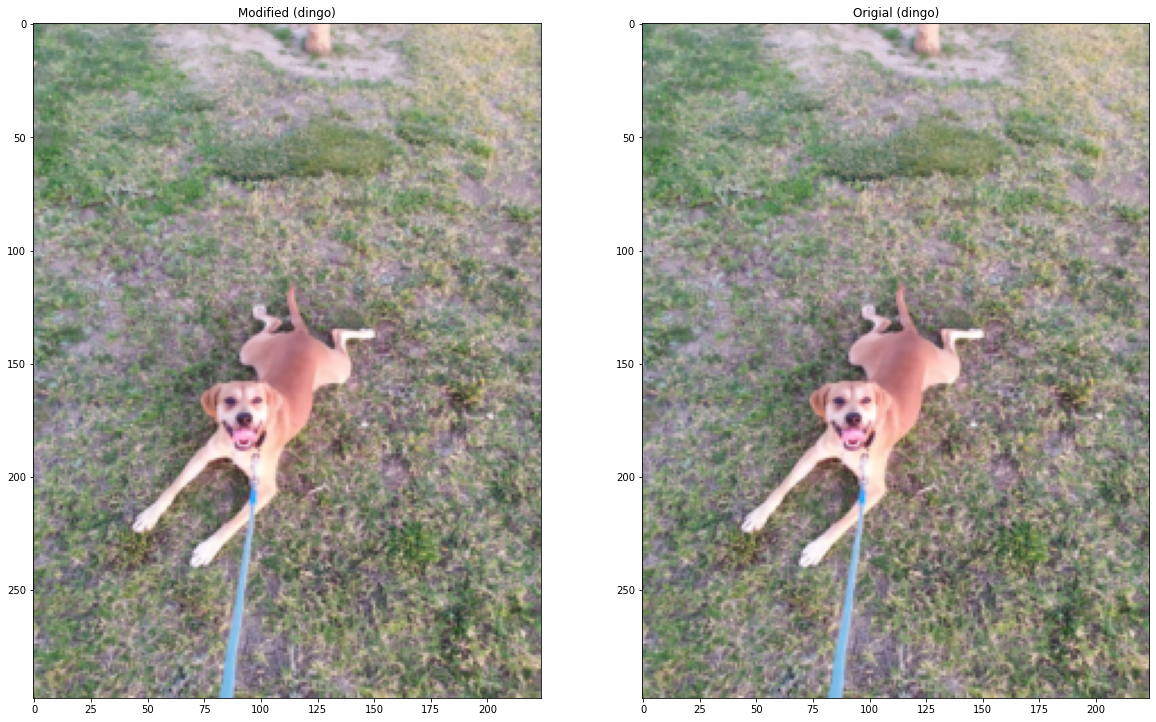

In [9]:
plot_images(image_modified, image, model, dictionary)